# Perceptron Networks
    This notebook is an attempt to reproduce three models of perceptron seen during the ANN bachelor subject.
0. [Sum Function](#0-sum-function)
1. [Single Layer Perceptron](#1-single-layer-perceptron)
2. [Single Layer and Training](#2-single-layer-with-training)
3. Multi Layer

In [3]:
# Setup

## Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
rd = np.random


## 0. Sum Function
    This Summation function will be used for the three models of perceptron used in this notebook.

In [4]:
# Define Summation Function
def sum_function(inputs, weights) -> float:
    '''
    Sum of the product of the inputs by the weights
    + w[i] * x[i]
    + w[i+1] * x[i+1] 
    + ... + w[n] * x[n]

    @return float: The Net Input / Pre-Activation result
    '''
    net_input: float = inputs.dot(weights)
    return net_input

## 1. Single Layer perceptron
    This SLP will use a standard step function as its activation.

In [5]:
# Define the Step Function
def step_function(net_input) -> int:
    '''
    1, if net_input >= 1
    0, if net_input < 1
    
    @return int: The Activation result
    '''
    activation: int = int(net_input >= 1)
    return activation

In [6]:
# Setup the case scenario #1
inputs  = np.array([-1,  7, 5])
weights = np.array([.8, .1, 0])

# Run the Perceptron
net_input: float = sum_function(inputs, weights)
activation: int  = step_function(net_input)

print(f'Summation: {net_input}\nStep Func: {activation}')

Summation: -0.09999999999999998
Step Func: 0


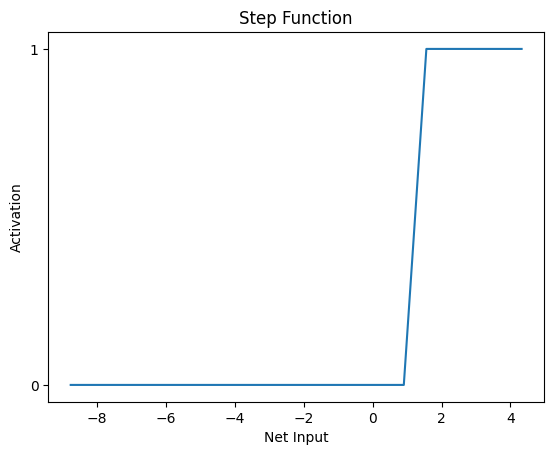

In [7]:
# Net Input VS. Activation 
inputs = []
weights = []
net_input = []
activation = []

for i in range(10):
    seed1, seed2 = 42 + i, 73 + i
    rd.seed(seed1)
    inputs.append(rd.randint(-10, 10, 3))
    rd.seed(seed2)
    weights.append(np.round(rd.rand(3), 4))

    # Run the Perceptron
    net_input.append(sum_function(inputs[i], weights[i]))
    activation.append(step_function(net_input[i]))


df1 = pd.DataFrame({
    'Inputs': inputs, 
    'Weights': weights, 
    'Net Input': net_input, 
    'Activation': activation
})
# display(df1)

sns.lineplot(x='Net Input', y='Activation', data=df1)
plt.title('Step Function')
plt.yticks(np.arange(0, 2, step=1))

plt.show()

## 2. Single layer with Training
    Now an ANN to predict logic gate (AND, NAND, OR, NOR) outputs based on two inputs

### AND Gate: two inputs for each output

|    A    |    B    | Output |
|---------|---------|--------|
|    0    |    0    |    0   |
|    0    |    1    |    0   |
|    1    |    0    |    0   |
|    1    |    1    |    1   |

In [8]:
# Setup the case scenario #2
inputs  = np.array([
    [0, 0], # 0
    [0, 1], # 1
    [1, 0], # 2
    [1, 1], # 3
])

outputs = {
     'AND': np.array([0, 0, 0, 1]),
    'NAND': np.array([1, 1, 1, 0]),
      'OR': np.array([0, 1, 1, 1]),
     'NOR': np.array([1, 0, 0, 0]),
}

LEARN_RATE = 0.1

In [99]:
# Define the activation function
def get_output(inputs, weights):
    '''
    Computes the output of a perceptron using a step function.

    Args:
        inputs (list of float): The input values to the perceptron.
        weights (list of float): The weights associated with the inputs.

    Returns:
        int: The output of the perceptron after applying the step function.
    '''
    s = sum_function(inputs, weights)
    return step_function(s)

# Define the training function
def train(gate):
    total_error      = 1
    weights          = np.array([0.0, 0.0]) # manually initialized
    expected_outputs = outputs[gate]
    epoch            = 0
    
    while(total_error != 0): # STOP CONDITION -----------------------------------------------------
        '''
        Checks for stop condition
        If != 0, reset total_error and continue training
        '''
        
        total_error = 0 # Reset

        # EACH INPUT PAIR len=4____________________________________________________________________
        print(f'\n --- EPOCH {epoch}', '----------------------------', '\n')
        for i in range(len(expected_outputs)):
            '''
            Calculates the current_error for each input pair
            Increments the total_error
            '''

            current_output = get_output(np.asarray(inputs[i]), weights)
            current_error  = abs(expected_outputs[i] - current_output)
            total_error    += current_error

            print()
            print(f'\tIN-PAIR{[i]}: ________ {inputs[i]}', '-'*10)
            print(f'\tWEIGHTS: ___________ {weights}')
            print(f'\tOUTPUT  A: {current_output}, X: {expected_outputs[i]}')
            print(f'\tERROR C: {current_error}, T: {total_error}')

            # EACH WEIGHT len=2____________________________________________________________________
            for j in range(len(weights)):
                tmp_weight = weights[j]
                weights[j] += (LEARN_RATE * inputs[i][j] * current_error)
                
                w = round(weights[j], 9)
                tmp = round(tmp_weight, 9)

                # print(f'w: {w} {type(w)} = tmp: {tmp} {type(tmp)}')
                if weights[j] != tmp_weight:
                    print(f'\t\tWeight[{j}] updated: {weights[j]}')
        
        epoch += 1

        print(f' ---------------------------- Total error: {total_error}')
        print('_'*100)
    
    # Training completed _________________________________________________________________________
    print()
    print(f'>>> Training complete!')
    print(f'Final weights: W0={weights[0]} and W1={weights[1]}')

In [100]:
train('AND')


 --- EPOCH 0 ---------------------------- 


	IN-PAIR[0]: ________ [0 0] ----------
	WEIGHTS: ___________ [0. 0.]
	OUTPUT  A: 0, X: 0
	ERROR C: 0, T: 0

	IN-PAIR[1]: ________ [0 1] ----------
	WEIGHTS: ___________ [0. 0.]
	OUTPUT  A: 0, X: 0
	ERROR C: 0, T: 0

	IN-PAIR[2]: ________ [1 0] ----------
	WEIGHTS: ___________ [0. 0.]
	OUTPUT  A: 0, X: 0
	ERROR C: 0, T: 0

	IN-PAIR[3]: ________ [1 1] ----------
	WEIGHTS: ___________ [0. 0.]
	OUTPUT  A: 0, X: 1
	ERROR C: 1, T: 1
		Weight[0] updated: 0.1
		Weight[1] updated: 0.1
 ---------------------------- Total error: 1
____________________________________________________________________________________________________

 --- EPOCH 1 ---------------------------- 


	IN-PAIR[0]: ________ [0 0] ----------
	WEIGHTS: ___________ [0.1 0.1]
	OUTPUT  A: 0, X: 0
	ERROR C: 0, T: 0

	IN-PAIR[1]: ________ [0 1] ----------
	WEIGHTS: ___________ [0.1 0.1]
	OUTPUT  A: 0, X: 0
	ERROR C: 0, T: 0

	IN-PAIR[2]: ________ [1 0] ----------
	WEIGHTS: ___________ 

In [80]:
train('OR')


 --- EPOCH 0 ---------------------------- 


	IN-PAIR[0]: ________ [0 0] ----------
	WEIGHTS: ___________ [0. 0.]
	OUTPUT  A: 0, X: 0
	ERROR C: 0, T: 0
		Weight[0]: 0.0
		Weight[1]: 0.0

	IN-PAIR[1]: ________ [0 1] ----------
	WEIGHTS: ___________ [0. 0.]
	OUTPUT  A: 0, X: 1
	ERROR C: 1, T: 1
		Weight[0]: 0.0
		Weight[1] updated: 0.1

	IN-PAIR[2]: ________ [1 0] ----------
	WEIGHTS: ___________ [0.  0.1]
	OUTPUT  A: 0, X: 1
	ERROR C: 1, T: 2
		Weight[0] updated: 0.1
		Weight[1]: 0.1

	IN-PAIR[3]: ________ [1 1] ----------
	WEIGHTS: ___________ [0.1 0.1]
	OUTPUT  A: 0, X: 1
	ERROR C: 1, T: 3
		Weight[0] updated: 0.2
		Weight[1] updated: 0.2
 ---------------------------- Total error: 3
____________________________________________________________________________________________________

 --- EPOCH 1 ---------------------------- 


	IN-PAIR[0]: ________ [0 0] ----------
	WEIGHTS: ___________ [0.2 0.2]
	OUTPUT  A: 0, X: 0
	ERROR C: 0, T: 0
		Weight[0]: 0.2
		Weight[1]: 0.2

	IN-PAIR[1]: __

In [12]:
# WONT STOP BECAUSE OF STOP CONDITION
# train('NAND') - Keeps increasing weights
# train('NOR')  - Never updates weights

## 3. Multi-layer perceptron

In [13]:
# TODO